In [2]:
pip list


Package                           Version     Editable project location
--------------------------------- ----------- -------------------------
aiobotocore                       2.12.3
aiofiles                          22.1.0
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
aiosqlite                         0.20.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.2
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('./istanbul_stock_exchange.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2788\169362901.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


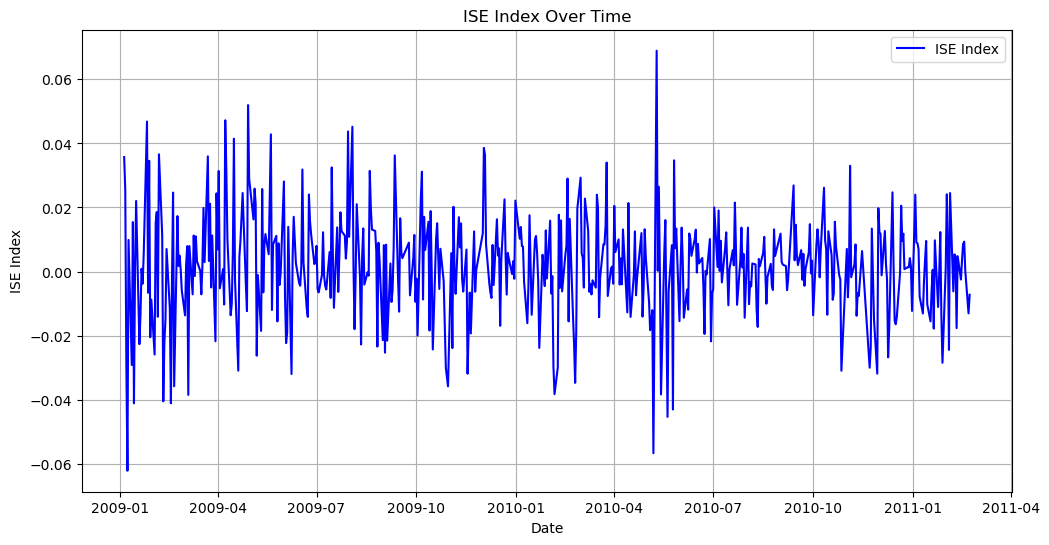

In [4]:
# 1. Line Chart: ISE index over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ISE_TL'], label='ISE Index', color='blue')
plt.title('ISE Index Over Time')
plt.xlabel('Date')
plt.ylabel('ISE Index')
plt.legend()
plt.grid()
plt.show()

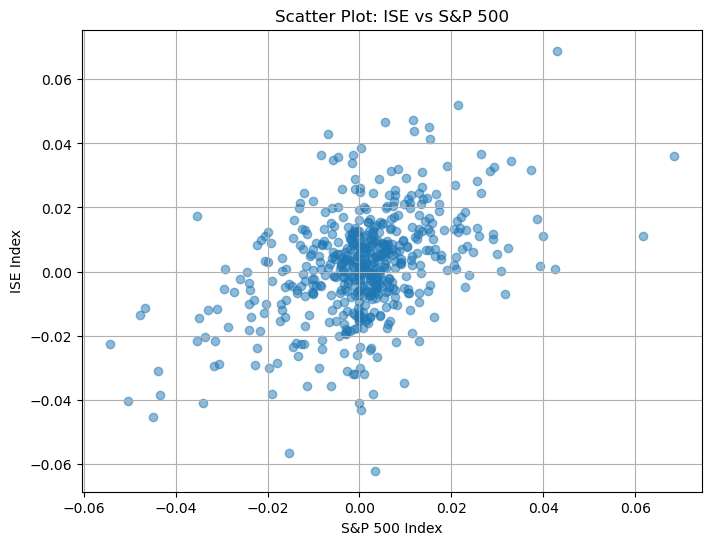

In [5]:
# 2. Scatter Plot: ISE vs SP
plt.figure(figsize=(8, 6))
plt.scatter(df['SP'], df['ISE_TL'], alpha=0.5)
plt.title('Scatter Plot: ISE vs S&P 500')
plt.xlabel('S&P 500 Index')
plt.ylabel('ISE Index')
plt.grid()
plt.show()

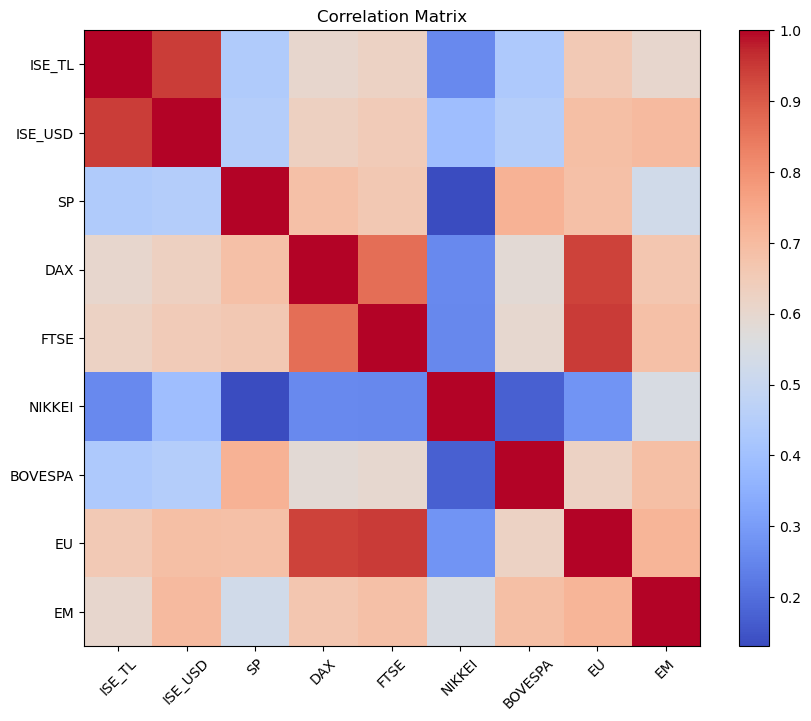

In [6]:
# 3. Heatmap: Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

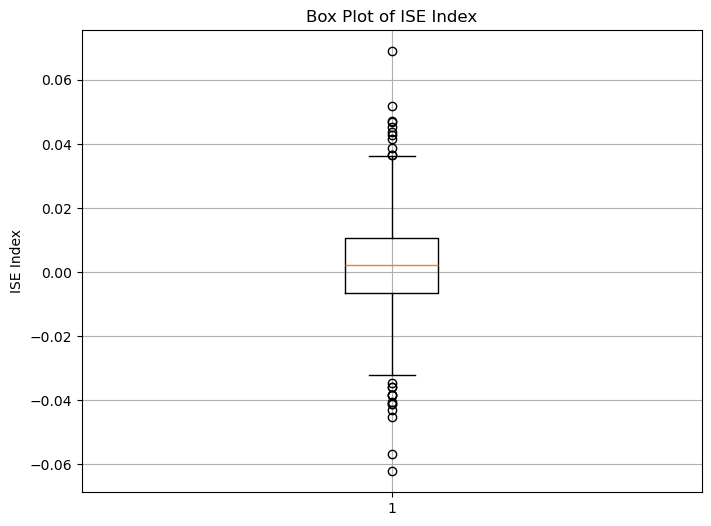

In [7]:

# 4. Box Plot: Distribution of ISE index
plt.figure(figsize=(8, 6))
plt.boxplot(df['ISE_TL'])
plt.title('Box Plot of ISE Index')
plt.ylabel('ISE Index')
plt.grid()
plt.show()

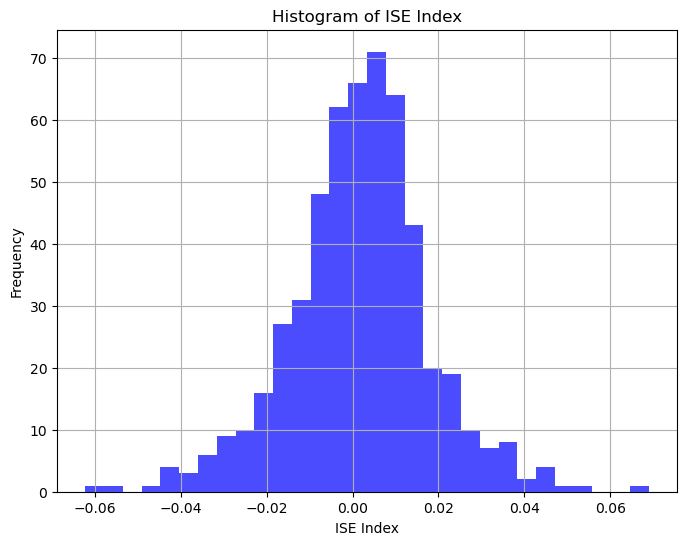

In [8]:
# 5. Histogram: Frequency distribution of ISE index
plt.figure(figsize=(8, 6))
plt.hist(df['ISE_TL'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of ISE Index')
plt.xlabel('ISE Index')
plt.ylabel('Frequency')
plt.grid()
plt.show()

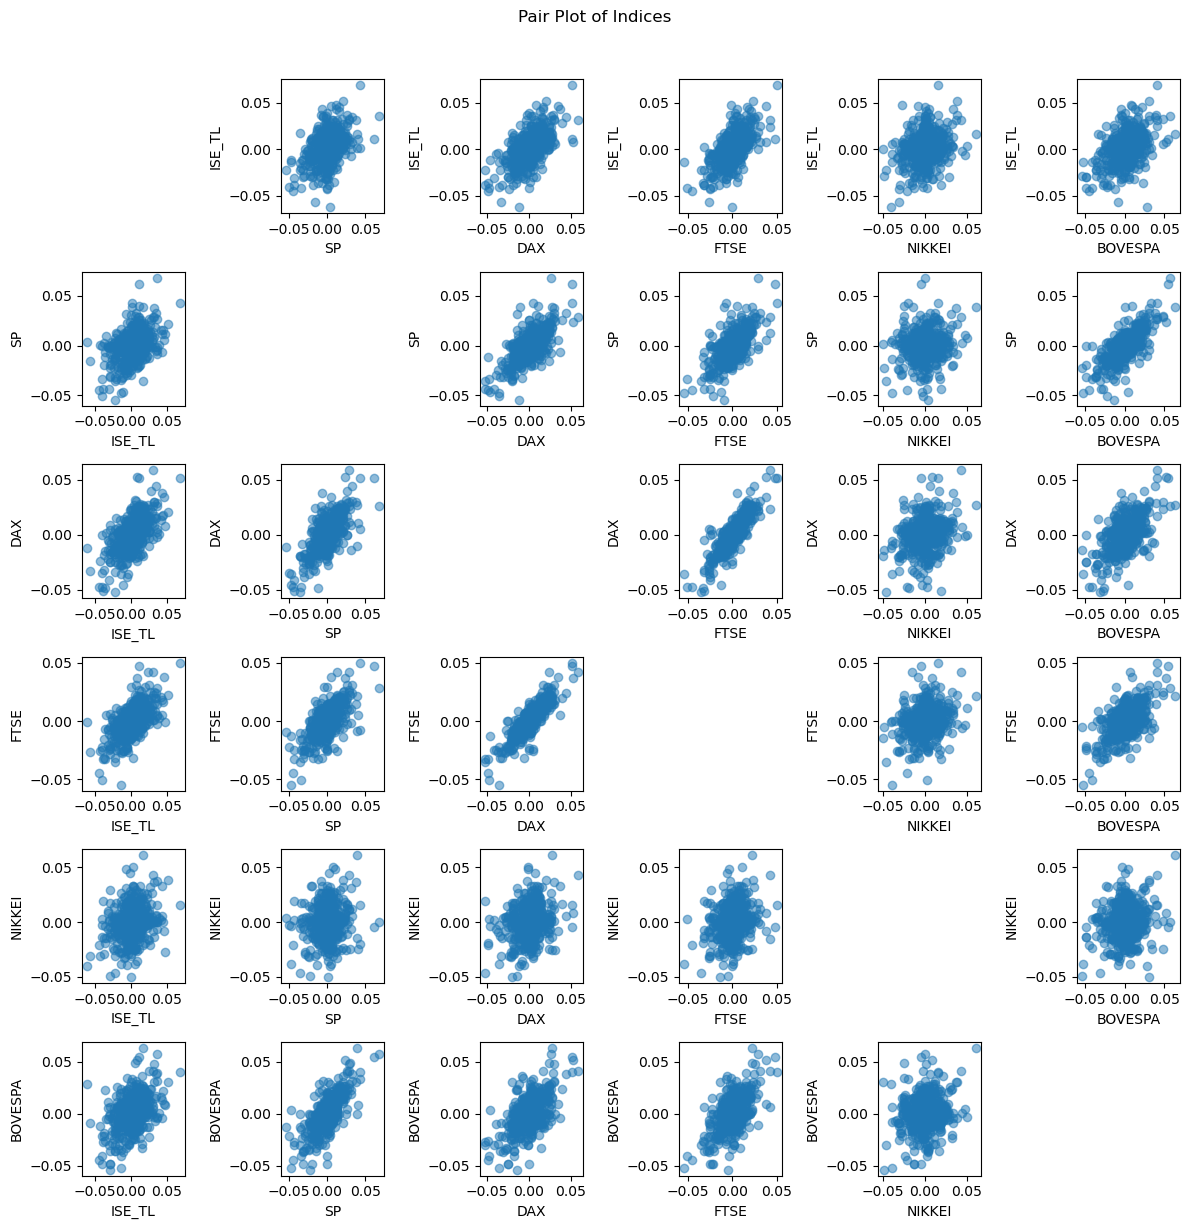

In [9]:
# 6. Pair Plot: Relationships between multiple indices
# Note: Matplotlib does not have a built-in pair plot function, but we can create scatter plots for pairs
indices = ['ISE_TL', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA']
plt.figure(figsize=(12, 12))
for i in range(len(indices)):
    for j in range(len(indices)):
        if i != j:
            plt.subplot(len(indices), len(indices), i * len(indices) + j + 1)
            plt.scatter(df[indices[j]], df[indices[i]], alpha=0.5)
            plt.xlabel(indices[j])
            plt.ylabel(indices[i])
plt.suptitle('Pair Plot of Indices', y=1.02)
plt.tight_layout()
plt.show()

In [10]:

# 7. Time Series Decomposition: Decompose ISE index
decomposition = seasonal_decompose(df['ISE_TL'], model='additive')
plt.figure(figsize=(12, 8))
decomposition.observed.plot(ax=plt.subplot(311), title='Observed')
decomposition.trend.plot(ax=plt.subplot(312), title='Trend')
decomposition.seasonal.plot(ax=plt.subplot(313), title='Seasonal')
plt.suptitle('Time Series Decomposition of ISE Index')
plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

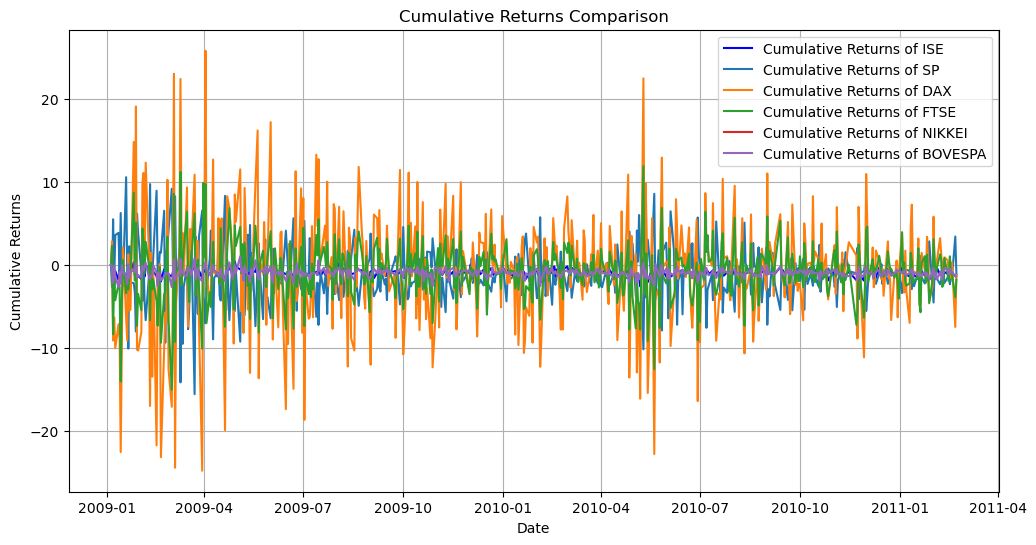

In [11]:
# 8. Cumulative Returns Plot
cumulative_returns = (df['ISE_TL'] / df['ISE_TL'].iloc[0]) - 1
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Returns of ISE', color='blue')
for index in ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA']:
    cumulative_returns_index = (df[index] / df[index].iloc[0]) - 1
    plt.plot(cumulative_returns_index, label=f'Cumulative Returns of {index}')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()